### Import libraries and data

In [3]:
import numpy as np 
import pandas as pd 
import re
import matplotlib.pyplot as plt
import seaborn as sns
import wikipedia
from wordcloud import WordCloud, STOPWORDS
import warnings
warnings.filterwarnings('ignore')

ModuleNotFoundError: No module named 'wikipedia'

#### Convert csv file dataset into pandas dataframe. Import our data using .read_csv()

In [5]:
data = pd.read_csv(r'C:\Users\parag\Desktop\ironhack\test\final_project_discount\current_farfetch_listings.csv\current_farfetch_listings.csv')

#### Pandas Dataframe information 

In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 188817 entries, 0 to 188816
Data columns (total 23 columns):
 #   Column                           Non-Null Count   Dtype  
---  ------                           --------------   -----  
 0   Unnamed: 0                       188817 non-null  int64  
 1   availableSizes                   162711 non-null  object 
 2   brand.id                         188817 non-null  int64  
 3   brand.name                       188817 non-null  object 
 4   gender                           188817 non-null  object 
 5   hasSimilarProducts               188817 non-null  bool   
 6   id                               188817 non-null  int64  
 7   images.cutOut                    188817 non-null  object 
 8   images.model                     188817 non-null  object 
 9   isCustomizable                   188817 non-null  bool   
 10  merchandiseLabel                 56441 non-null   object 
 11  merchandiseLabelField            188817 non-null  object 
 12  me

### Exploratory Data Analysis (EDA)

#### Statistical overview from numerical columns

In [7]:
data.describe()

,Unnamed: 0,brand.id,id,merchantId,priceInfo.finalPrice,priceInfo.initialPrice,priceInfo.installmentsLabel,stockTotal
count,188817.000000,1.888170e+05,1.888170e+05,188817.000000,188817.000000,188817.000000,0.0,188817.000000
mean,89.498594,1.227366e+06,1.354713e+07,10091.138753,1079.983513,1230.788859,NaN,27.833055
std,51.960075,2.194786e+06,6.310952e+05,838.257401,1910.217119,1984.018813,NaN,464.593973
min,0.000000,6.000000e+00,1.004756e+07,9003.000000,2.000000,2.000000,NaN,0.000000
25%,44.000000,1.828600e+04,1.337835e+07,9449.000000,303.000000,378.000000,NaN,1.000000
50%,89.000000,1.184510e+05,1.370027e+07,9843.000000,612.000000,730.000000,NaN,4.000000
75%,134.000000,1.175963e+06,1.397942e+07,10600.000000,1163.000000,1360.000000,NaN,10.000000
max,179.000000,1.094619e+07,1.429129e+07,12418.000000,89724.000000,89724.000000,NaN,16987.000000


In [8]:
data.head()

,Unnamed: 0,availableSizes,brand.id,brand.name,gender,hasSimilarProducts,id,images.cutOut,images.model,isCustomizable,...,priceInfo.currencyCode,priceInfo.discountLabel,priceInfo.finalPrice,priceInfo.formattedFinalPrice,priceInfo.formattedInitialPrice,priceInfo.initialPrice,priceInfo.installmentsLabel,priceInfo.isOnSale,shortDescription,stockTotal
0,0,NaN,8360,Miu Miu,women,True,13415450,https://cdn-images.farfetch-contents.com/13/41...,https://cdn-images.farfetch-contents.com/13/41...,False,...,SGD,NaN,1080,"$1,080","$1,080",1080,NaN,False,logo print strap sandals,130
1,1,"[{'scaleId': 0, 'size': 'XXS'}, {'scaleId': 0,...",2049368,Self-Portrait,women,True,13784566,https://cdn-images.farfetch-contents.com/13/78...,https://cdn-images.farfetch-contents.com/13/78...,False,...,SGD,20% Off,392,$392,$490,490,NaN,True,embroidered midi dress,14
2,2,NaN,15514,Fendi,women,True,13377441,https://cdn-images.farfetch-contents.com/13/37...,https://cdn-images.farfetch-contents.com/13/37...,False,...,SGD,NaN,1245,"$1,245","$1,245",1245,NaN,False,FendiMania sock style sneakers,68
3,3,"[{'scaleId': 0, 'size': 'One Size'}]",49486,A.P.C.,women,False,13744082,https://cdn-images.farfetch-contents.com/13/74...,https://cdn-images.farfetch-contents.com/13/74...,False,...,SGD,20% Off,308,$308,$385,385,NaN,True,top zip wallet,1
4,4,NaN,34624,Prada,women,True,13668256,https://cdn-images.farfetch-contents.com/13/66...,https://cdn-images.farfetch-contents.com/13/66...,False,...,SGD,NaN,1248,"$1,248","$1,248",1248,NaN,False,slingback 65 pumps,78


#### Overview over different columns from the dataframe 
- understand which are the irrelevant columns for the dataframe future model prediction

In [9]:
# To get column names from the new dataframe

data.columns

Index(['Unnamed: 0', 'availableSizes', 'brand.id', 'brand.name', 'gender',
       'hasSimilarProducts', 'id', 'images.cutOut', 'images.model',
       'isCustomizable', 'merchandiseLabel', 'merchandiseLabelField',
       'merchantId', 'priceInfo.currencyCode', 'priceInfo.discountLabel',
       'priceInfo.finalPrice', 'priceInfo.formattedFinalPrice',
       'priceInfo.formattedInitialPrice', 'priceInfo.initialPrice',
       'priceInfo.installmentsLabel', 'priceInfo.isOnSale', 'shortDescription',
       'stockTotal'],
      dtype='object')

In [10]:
# Contain counts of unique values (making it to each column from the new dataframe created)

data['brand.id'].value_counts()

57889       2605
34624       2522
25354       2501
547344      2490
3440        2340
            ... 
178642         1
6133942        1
80278          1
7017895        1
10041245       1
Name: brand.id, Length: 2320, dtype: int64

In [11]:
data['availableSizes'].value_counts()

[{'scaleId': 0, 'size': 'One Size'}]                                                                                                                                                         49701
[{'scaleId': 0, 'size': 'XS'}, {'scaleId': 0, 'size': 'S'}, {'scaleId': 0, 'size': 'M'}, {'scaleId': 0, 'size': 'L'}]                                                                        10768
[{'scaleId': 0, 'size': 'S'}]                                                                                                                                                                10468
[{'scaleId': 0, 'size': 'M'}]                                                                                                                                                                 9469
[{'scaleId': 0, 'size': 'XS'}, {'scaleId': 0, 'size': 'S'}, {'scaleId': 0, 'size': 'M'}]                                                                                                      7854
                         

In [12]:
# Create a new column based on the available sizes (total number of available sizes for a specific product)
        
data['n_sizes'] = [ len(re.findall("('[A-Z]+'|'\w{3} \w{4}')",p_list)) if (isinstance(p_list, str)) else 0 for p_list in data['availableSizes'] ]

In [13]:
data['n_sizes']

0         0
1         6
2         0
3         1
4         0
         ..
188812    1
188813    1
188814    1
188815    1
188816    1
Name: n_sizes, Length: 188817, dtype: int64

In [14]:
data['brand.id'].value_counts()

57889       2605
34624       2522
25354       2501
547344      2490
3440        2340
            ... 
178642         1
6133942        1
80278          1
7017895        1
10041245       1
Name: brand.id, Length: 2320, dtype: int64

In [15]:
data['brand.name'].value_counts()

Chanel Pre-Owned    2605
Prada               2522
Gucci               2501
Saint Laurent       2490
Dolce & Gabbana     2340
                    ... 
BRUNO BORDESE          1
Tagliovivo             1
Sankuanz               1
I'M Isola Marras       1
Tekla Fabrics          1
Name: brand.name, Length: 2336, dtype: int64

In [16]:
data['gender'].value_counts()

women     176978
unisex     11839
Name: gender, dtype: int64

In [17]:
data['hasSimilarProducts'].value_counts()

True     142021
False     46796
Name: hasSimilarProducts, dtype: int64

In [18]:
data['isCustomizable'].value_counts()

# Not significant for the model

False    188457
True        360
Name: isCustomizable, dtype: int64

In [19]:
data['merchandiseLabel'].value_counts() 

# it has 132376 NaN values which is 70% of the dataframe
# it can be added NoTag to the NaN 

New Season              41469
Positively Conscious    12324
Permanent Collection     1275
Seasonal Pick             741
Exclusive                 632
Name: merchandiseLabel, dtype: int64

In [20]:
data['merchandiseLabelField'].value_counts() 

# Duplicate from column above

NoTag        146702
NewSeason     41483
Exclusive       632
Name: merchandiseLabelField, dtype: int64

In [21]:
data['merchantId'].value_counts()

9359     6689
9462     6410
9682     4681
10031    4097
9164     3674
         ... 
9967        1
9350        1
11247       1
12142       1
9460        1
Name: merchantId, Length: 1002, dtype: int64

In [24]:
data['priceInfo.currencyCode'].value_counts() 

# Not significant, since it has the same value per column

SGD    188817
Name: priceInfo.currencyCode, dtype: int64

In [25]:
data['priceInfo.discountLabel'].value_counts()

50% Off    16070
30% Off    14415
40% Off    12736
20% Off    10711
60% Off     5049
25% Off     2225
35% Off     2181
10% Off     1587
15% Off     1119
45% Off      719
70% Off      707
55% Off      316
65% Off      276
75% Off      162
80% Off       12
90% Off        2
Name: priceInfo.discountLabel, dtype: int64

In [26]:
data['priceInfo.finalPrice'].value_counts()

308      824
350      690
711      593
273      559
457      552
        ... 
9548       1
8227       1
7121       1
10073      1
13471      1
Name: priceInfo.finalPrice, Length: 6201, dtype: int64

In [27]:
data['priceInfo.formattedFinalPrice'].value_counts() 

# drop is duplicate from the column above

$308       824
$350       690
$711       593
$273       559
$457       552
          ... 
$9,548       1
$8,227       1
$7,121       1
$10,073      1
$13,471      1
Name: priceInfo.formattedFinalPrice, Length: 6201, dtype: int64

In [28]:
data['priceInfo.initialPrice'].value_counts()

350      893
308      843
273      665
869      643
711      630
        ... 
3297       1
2848       1
3574       1
6034       1
13471      1
Name: priceInfo.initialPrice, Length: 6393, dtype: int64

In [29]:
data['priceInfo.formattedInitialPrice'].value_counts() 

# drop is duplicate from the column above

$350       893
$308       843
$273       665
$869       643
$711       630
          ... 
$3,297       1
$2,848       1
$3,574       1
$6,034       1
$13,471      1
Name: priceInfo.formattedInitialPrice, Length: 6393, dtype: int64

In [30]:
data['priceInfo.installmentsLabel'].isna().sum() 

# eliminate NaN column

188817

In [31]:
data['priceInfo.isOnSale'].value_counts()

False    119458
True      69359
Name: priceInfo.isOnSale, dtype: int64

In [32]:
data['shortDescription'].value_counts()

cropped trousers                   324
round frame sunglasses             312
logo print T-shirt                 271
round frame glasses                241
cat eye sunglasses                 231
                                  ... 
Dior By Dior sunglasses              1
DiorClan sunglasses                  1
Teak sunglasses                      1
IC! Berlin Oroshi round glasses      1
whisker print plate                  1
Name: shortDescription, Length: 118706, dtype: int64

In [33]:
data['stockTotal'].value_counts()

1       48398
2       26074
3       18265
4       13422
5       10212
        ...  
331         1
911         1
888         1
1041        1
637         1
Name: stockTotal, Length: 684, dtype: int64

#### Dropping irrelevant columns 

In [34]:
farfetch = data.drop(['Unnamed: 0','availableSizes','images.cutOut','images.model','priceInfo.currencyCode','merchandiseLabelField','priceInfo.formattedFinalPrice','priceInfo.formattedInitialPrice','priceInfo.installmentsLabel'], axis=1)

In [35]:
farfetch

,brand.id,brand.name,gender,hasSimilarProducts,id,isCustomizable,merchandiseLabel,merchantId,priceInfo.discountLabel,priceInfo.finalPrice,priceInfo.initialPrice,priceInfo.isOnSale,shortDescription,stockTotal,n_sizes
0,8360,Miu Miu,women,True,13415450,False,NaN,9359,NaN,1080,1080,False,logo print strap sandals,130,0
1,2049368,Self-Portrait,women,True,13784566,False,NaN,9319,20% Off,392,490,True,embroidered midi dress,14,6
2,15514,Fendi,women,True,13377441,False,NaN,9140,NaN,1245,1245,False,FendiMania sock style sneakers,68,0
3,49486,A.P.C.,women,False,13744082,False,NaN,9031,20% Off,308,385,True,top zip wallet,1,1
4,34624,Prada,women,True,13668256,False,NaN,9339,NaN,1248,1248,False,slingback 65 pumps,78,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
188812,59394,Fornasetti,unisex,False,10047577,False,Permanent Collection,9089,NaN,207,207,False,face print plate,6,1
188813,59394,Fornasetti,unisex,False,10047571,False,NaN,9089,NaN,207,207,False,boss print plate,2,1
188814,59394,Fornasetti,unisex,False,10047569,False,NaN,9089,NaN,207,207,False,face print plate,2,1
188815,59394,Fornasetti,unisex,False,10047567,False,NaN,9089,NaN,207,207,False,whisker print plate,10,1


#### Generation of worldcloud on wikipedia to see farfetch key words 
- relate what type of words are associate with the e-commerce company Farfetch

In [36]:
df1 = wikipedia.page('Farfetch')
df1_content = df1.content

NameError: name 'wikipedia' is not defined

In [37]:
plt.figure(figsize = (20,20)) 
wc = WordCloud(max_words = 300 , width = 1200 , height = 600 , background_color ='white',stopwords = STOPWORDS)
wc.generate(df1_content) # Generating WordCloud
plt.imshow(wc , interpolation = 'bilinear')

NameError: name 'WordCloud' is not defined

<Figure size 1440x1440 with 0 Axes>

#### Check NaN values per column.

In [38]:
nulls = pd.DataFrame(farfetch.isna().sum()/len(farfetch))
nulls= nulls.reset_index()
nulls.columns = ['column_name', 'Percentage Null Values']
nulls.sort_values(by='Percentage Null Values', ascending = False)

,column_name,Percentage Null Values
6,merchandiseLabel,0.701081
8,priceInfo.discountLabel,0.638343
0,brand.id,0.000000
1,brand.name,0.000000
2,gender,0.000000
3,hasSimilarProducts,0.000000
4,id,0.000000
5,isCustomizable,0.000000
7,merchantId,0.000000
9,priceInfo.finalPrice,0.000000


In [39]:
farfetch.isna().sum()

brand.id                        0
brand.name                      0
gender                          0
hasSimilarProducts              0
id                              0
isCustomizable                  0
merchandiseLabel           132376
merchantId                      0
priceInfo.discountLabel    120530
priceInfo.finalPrice            0
priceInfo.initialPrice          0
priceInfo.isOnSale              0
shortDescription                0
stockTotal                      0
n_sizes                         0
dtype: int64

#### Fill NaNs from merchandise label and price discount label

In [40]:
farfetch['merchandiseLabel'] = farfetch['merchandiseLabel'].fillna("NoTag")

In [41]:
farfetch['priceInfo.discountLabel'] = farfetch.apply(lambda row: str(int(100-(row['priceInfo.finalPrice']/row['priceInfo.initialPrice'])*100)) + "% Off", axis=1)

In [42]:
farfetch['priceInfo.discountLabel'].value_counts()

0% Off     119540
50% Off      8808
29% Off      8208
49% Off      7212
40% Off      6632
            ...  
89% Off         2
3% Off          1
67% Off         1
56% Off         1
66% Off         1
Name: priceInfo.discountLabel, Length: 71, dtype: int64

In [43]:
farfetch.isna().sum()

#double check nan

brand.id                   0
brand.name                 0
gender                     0
hasSimilarProducts         0
id                         0
isCustomizable             0
merchandiseLabel           0
merchantId                 0
priceInfo.discountLabel    0
priceInfo.finalPrice       0
priceInfo.initialPrice     0
priceInfo.isOnSale         0
shortDescription           0
stockTotal                 0
n_sizes                    0
dtype: int64

#### Rename the columns so they follow the PE8 (snake case)

In [44]:
farfetch.columns = map(str.lower, farfetch.columns)
farfetch.columns = farfetch.columns.str.replace('.','_')

C:\Users\parag\AppData\Local\Temp/ipykernel_19576/2567237223.py:2: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  farfetch.columns = farfetch.columns.str.replace('.','_')


In [45]:
# rename column names

farfetch.rename(columns={'brand_id':'brand_id', 'brand_name':'brand_name', 'gender':'gender', 'hassimilarproducts':'similar_products', 'id':'id',
       'iscustomizable':'customizable', 'merchandiselabel':'merchandise_label', 'merchantid':'merchant_id',
       'priceinfo_discountlabel':'discount_label', 'priceinfo_finalprice':'final_price',
       'priceinfo_initialprice':'initial_price', 'priceinfo_isonsale':'on_sale', 'shortdescription':'short_description',
       'stocktotal':'stock_total', 'n_sizes':'sizes'}, inplace=True)

In [46]:
farfetch

,brand_id,brand_name,gender,similar_products,id,customizable,merchandise_label,merchant_id,discount_label,final_price,initial_price,on_sale,short_description,stock_total,sizes
0,8360,Miu Miu,women,True,13415450,False,NoTag,9359,0% Off,1080,1080,False,logo print strap sandals,130,0
1,2049368,Self-Portrait,women,True,13784566,False,NoTag,9319,20% Off,392,490,True,embroidered midi dress,14,6
2,15514,Fendi,women,True,13377441,False,NoTag,9140,0% Off,1245,1245,False,FendiMania sock style sneakers,68,0
3,49486,A.P.C.,women,False,13744082,False,NoTag,9031,20% Off,308,385,True,top zip wallet,1,1
4,34624,Prada,women,True,13668256,False,NoTag,9339,0% Off,1248,1248,False,slingback 65 pumps,78,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
188812,59394,Fornasetti,unisex,False,10047577,False,Permanent Collection,9089,0% Off,207,207,False,face print plate,6,1
188813,59394,Fornasetti,unisex,False,10047571,False,NoTag,9089,0% Off,207,207,False,boss print plate,2,1
188814,59394,Fornasetti,unisex,False,10047569,False,NoTag,9089,0% Off,207,207,False,face print plate,2,1
188815,59394,Fornasetti,unisex,False,10047567,False,NoTag,9089,0% Off,207,207,False,whisker print plate,10,1


#### Dropping extra columns as they have irrelevant value for the dataframe or are duplicated

In [47]:
farfetch_1= farfetch.drop(['brand_name','id','customizable','final_price'],axis=1)
farfetch_1

,brand_id,gender,similar_products,merchandise_label,merchant_id,discount_label,initial_price,on_sale,short_description,stock_total,sizes
0,8360,women,True,NoTag,9359,0% Off,1080,False,logo print strap sandals,130,0
1,2049368,women,True,NoTag,9319,20% Off,490,True,embroidered midi dress,14,6
2,15514,women,True,NoTag,9140,0% Off,1245,False,FendiMania sock style sneakers,68,0
3,49486,women,False,NoTag,9031,20% Off,385,True,top zip wallet,1,1
4,34624,women,True,NoTag,9339,0% Off,1248,False,slingback 65 pumps,78,0
...,...,...,...,...,...,...,...,...,...,...,...
188812,59394,unisex,False,Permanent Collection,9089,0% Off,207,False,face print plate,6,1
188813,59394,unisex,False,NoTag,9089,0% Off,207,False,boss print plate,2,1
188814,59394,unisex,False,NoTag,9089,0% Off,207,False,face print plate,2,1
188815,59394,unisex,False,NoTag,9089,0% Off,207,False,whisker print plate,10,1


In [48]:
# checking correlation for the numerical columns

farfetch_1.corr()

,brand_id,similar_products,merchant_id,initial_price,on_sale,stock_total,sizes
brand_id,1.000000,-0.071575,0.110027,-0.064394,-0.020379,0.004206,0.041367
similar_products,-0.071575,1.000000,0.020928,-0.035469,0.303222,0.023277,0.255091
merchant_id,0.110027,0.020928,1.000000,0.002077,0.009533,0.000185,0.062902
initial_price,-0.064394,-0.035469,0.002077,1.000000,-0.069876,-0.001527,-0.015378
on_sale,-0.020379,0.303222,0.009533,-0.069876,1.000000,-0.031062,0.068680
stock_total,0.004206,0.023277,0.000185,-0.001527,-0.031062,1.000000,-0.030728
sizes,0.041367,0.255091,0.062902,-0.015378,0.068680,-0.030728,1.000000


In [49]:
farfetch_1.describe()

,brand_id,merchant_id,initial_price,stock_total,sizes
count,1.888170e+05,188817.000000,188817.000000,188817.000000,188817.000000
mean,1.227366e+06,10091.138753,1230.788859,27.833055,1.843388
std,2.194786e+06,838.257401,1984.018813,464.593973,1.566240
min,6.000000e+00,9003.000000,2.000000,0.000000,0.000000
25%,1.828600e+04,9449.000000,378.000000,1.000000,1.000000
50%,1.184510e+05,9843.000000,730.000000,4.000000,1.000000
75%,1.175963e+06,10600.000000,1360.000000,10.000000,3.000000
max,1.094619e+07,12418.000000,89724.000000,16987.000000,9.000000


#### Checking numerical and categorical data in different plots for better visualization

<AxesSubplot:xlabel='on_sale', ylabel='count'>

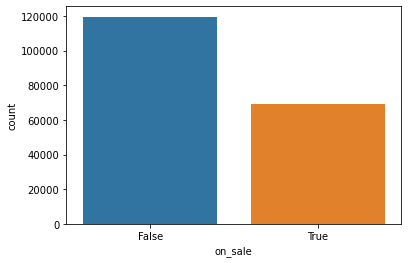

In [50]:
# Bar Plot if product is on sale or not, which is the target variable

sns.countplot(x='on_sale', data=farfetch_1)

TypeError: No loop matching the specified signature and casting was found for ufunc add

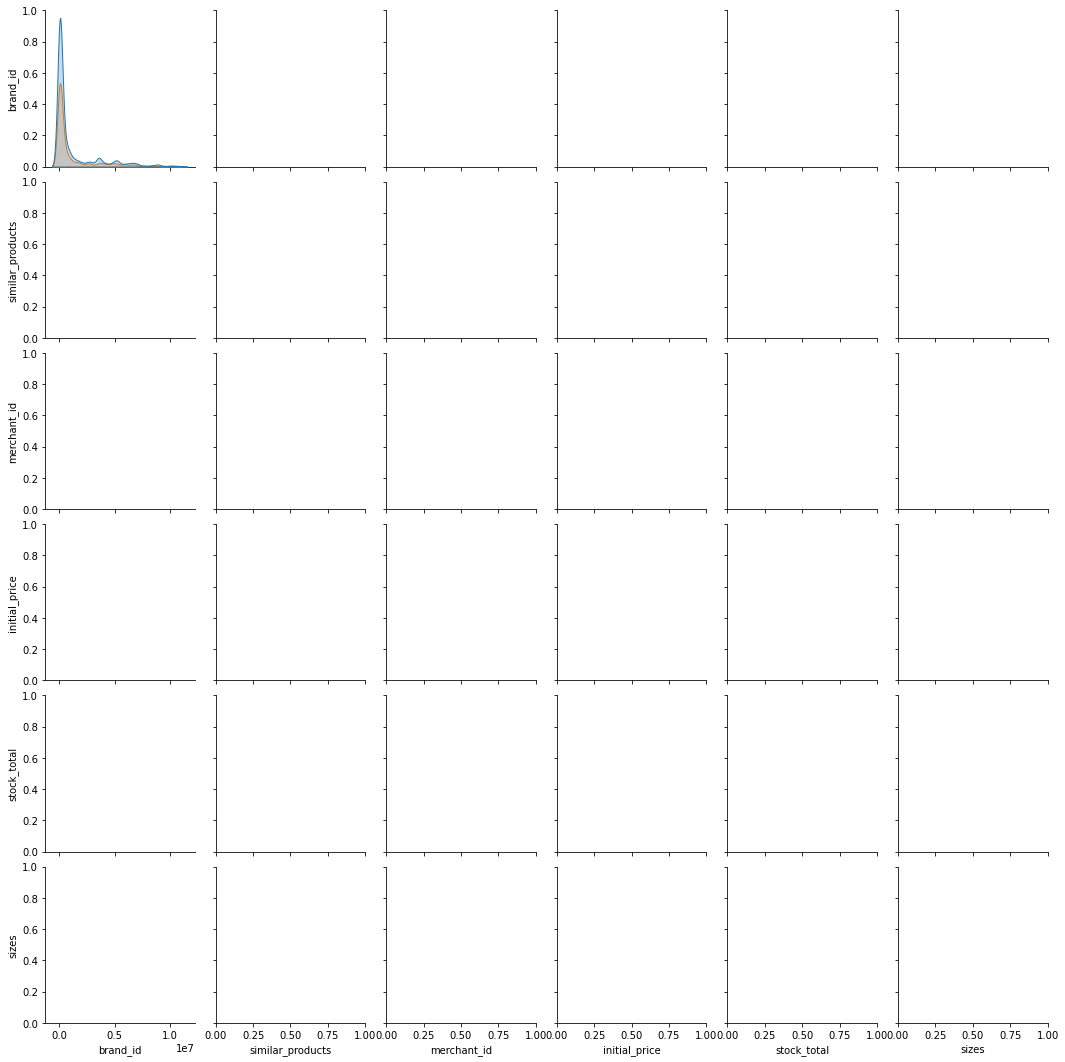

In [51]:
# Paitplots on the relation between different numerical variables in the dataset

sns.pairplot(farfetch_1, hue='on_sale');

In [ ]:
# Countplot of the categorical variables in relation with the target variable

f, axes = plt.subplots(ncols=4,figsize=(16,5))

sns.countplot(x='sizes',hue='on_sale',ax=axes[0],data=farfetch_1)
sns.countplot(x='similar_products',hue='on_sale',ax=axes[1],data=farfetch_1)
sns.countplot(x='gender',hue='on_sale',ax=axes[2],data=farfetch_1)
sns.countplot(x='merchandise_label',hue='on_sale',ax=axes[3],data=farfetch_1)
plt.xticks(rotation=90)

#### Separating numerical and categorical data

In [55]:
numerical=farfetch_1[['brand_id','similar_products','merchant_id','initial_price','stock_total','sizes']]

In [56]:
numerical

,brand_id,similar_products,merchant_id,initial_price,stock_total,sizes
0,8360,True,9359,1080,130,0
1,2049368,True,9319,490,14,6
2,15514,True,9140,1245,68,0
3,49486,False,9031,385,1,1
4,34624,True,9339,1248,78,0
...,...,...,...,...,...,...
188812,59394,False,9089,207,6,1
188813,59394,False,9089,207,2,1
188814,59394,False,9089,207,2,1
188815,59394,False,9089,207,10,1


brand_id


C:\Users\parag\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


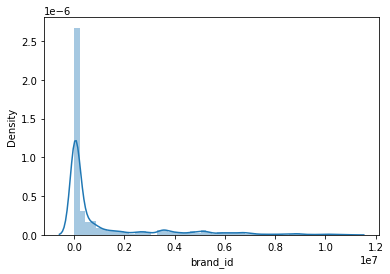

similar_products


C:\Users\parag\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


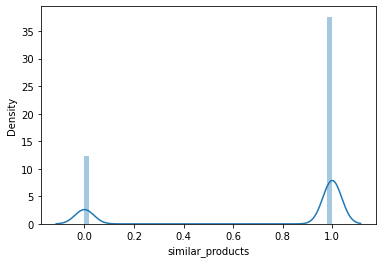

merchant_id


C:\Users\parag\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


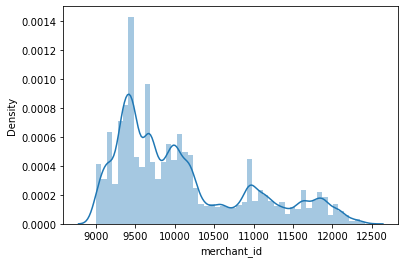

initial_price


C:\Users\parag\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


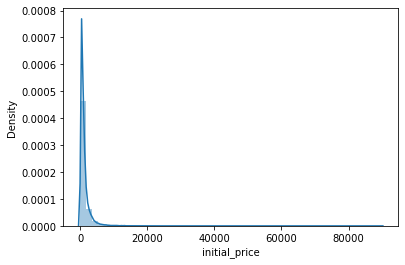

stock_total


C:\Users\parag\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


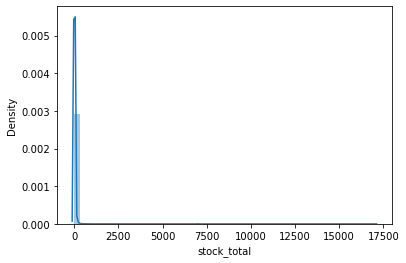

sizes


C:\Users\parag\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


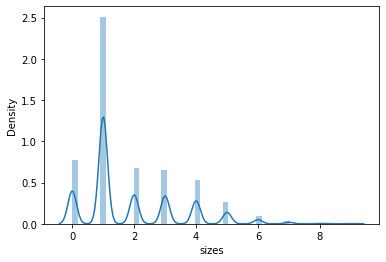

In [57]:
# Checking numerical data

for col in numerical.columns:
    print (col)
    sns.distplot(numerical[col])
    plt.show()

brand_id


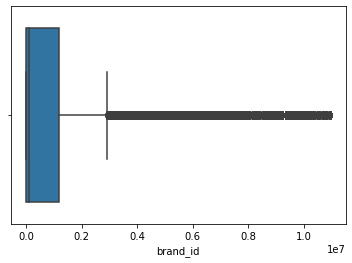

similar_products


TypeError: numpy boolean subtract, the `-` operator, is not supported, use the bitwise_xor, the `^` operator, or the logical_xor function instead.

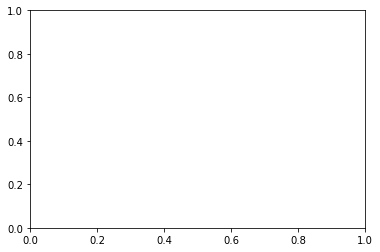

In [58]:
# Checking for outliers

for i in numerical.columns:
    print (i)
    sns.boxplot(x=numerical[i])
    plt.show()

In [65]:
categorical=farfetch_1[['gender','merchandise_label']]
categorical

,gender,merchandise_label
0,women,NoTag
1,women,NoTag
2,women,NoTag
3,women,NoTag
4,women,NoTag
...,...,...
188812,unisex,Permanent Collection
188813,unisex,NoTag
188814,unisex,NoTag
188815,unisex,NoTag


#### Scaling Features (numerical features have big differences from each other)

In [66]:
import pandas as pd
from sklearn import datasets
from sklearn.preprocessing import StandardScaler
import pickle

scaler = StandardScaler().fit(numerical)
numericals = scaler.transform(numerical)
numericals

with open('scaler.pkl', 'wb') as file:
    pickle.dump(scaler,file)

In [67]:
numericals = pd.DataFrame(numericals)
numericals

,0,1,2,3,4,5
0,-0.555411,0.574021,-0.873408,-0.076002,0.219906,-1.176955
1,0.374526,0.574021,-0.921126,-0.373379,-0.029775,2.653887
2,-0.552152,0.574021,-1.134665,0.007163,0.086456,-1.176955
3,-0.536673,-1.742095,-1.264697,-0.426302,-0.057756,-0.538481
4,-0.543445,0.574021,-0.897267,0.008675,0.107980,-1.176955
...,...,...,...,...,...,...
188812,-0.532159,-1.742095,-1.195506,-0.516019,-0.046994,-0.538481
188813,-0.532159,-1.742095,-1.195506,-0.516019,-0.055604,-0.538481
188814,-0.532159,-1.742095,-1.195506,-0.516019,-0.055604,-0.538481
188815,-0.532159,-1.742095,-1.195506,-0.516019,-0.038384,-0.538481


0


C:\Users\parag\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


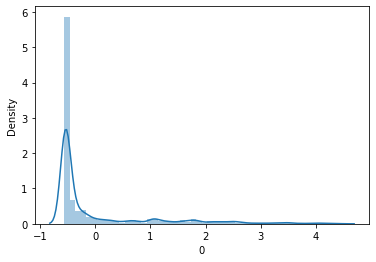

1


C:\Users\parag\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


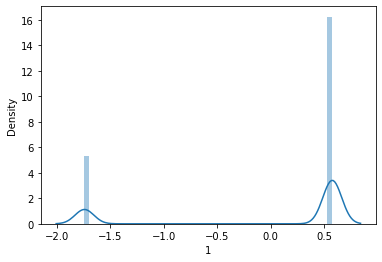

2


C:\Users\parag\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


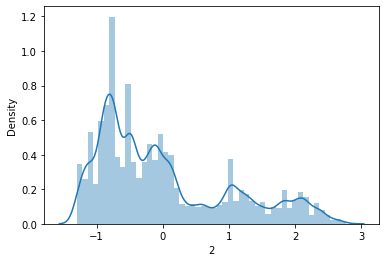

3


C:\Users\parag\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


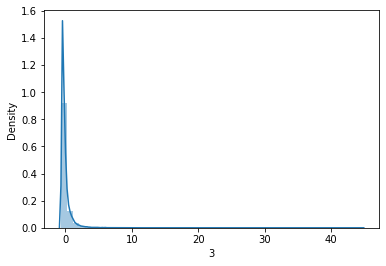

4


C:\Users\parag\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


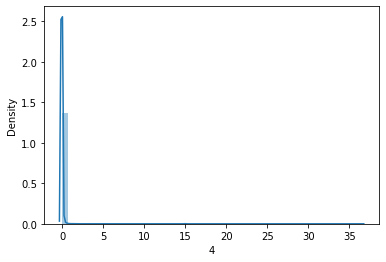

5


C:\Users\parag\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


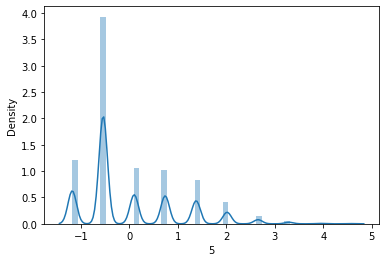

In [68]:
for col in numericals.columns:
    print (col)
    sns.distplot(numericals[col])
    plt.show()

#### Dummify categorical data, to be able to process the model

In [69]:
categoricald= pd.get_dummies(categorical)

In [70]:
categoricald

,gender_unisex,gender_women,merchandise_label_Exclusive,merchandise_label_New Season,merchandise_label_NoTag,merchandise_label_Permanent Collection,merchandise_label_Positively Conscious,merchandise_label_Seasonal Pick
0,0,1,0,0,1,0,0,0
1,0,1,0,0,1,0,0,0
2,0,1,0,0,1,0,0,0
3,0,1,0,0,1,0,0,0
4,0,1,0,0,1,0,0,0
...,...,...,...,...,...,...,...,...
188812,1,0,0,0,0,1,0,0
188813,1,0,0,0,1,0,0,0
188814,1,0,0,0,1,0,0,0
188815,1,0,0,0,1,0,0,0


In [71]:
new_farfetch=pd.concat([numericals,categoricald], axis=1)
new_farfetch

,0,1,2,3,4,5,gender_unisex,gender_women,merchandise_label_Exclusive,merchandise_label_New Season,merchandise_label_NoTag,merchandise_label_Permanent Collection,merchandise_label_Positively Conscious,merchandise_label_Seasonal Pick
0,-0.555411,0.574021,-0.873408,-0.076002,0.219906,-1.176955,0,1,0,0,1,0,0,0
1,0.374526,0.574021,-0.921126,-0.373379,-0.029775,2.653887,0,1,0,0,1,0,0,0
2,-0.552152,0.574021,-1.134665,0.007163,0.086456,-1.176955,0,1,0,0,1,0,0,0
3,-0.536673,-1.742095,-1.264697,-0.426302,-0.057756,-0.538481,0,1,0,0,1,0,0,0
4,-0.543445,0.574021,-0.897267,0.008675,0.107980,-1.176955,0,1,0,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
188812,-0.532159,-1.742095,-1.195506,-0.516019,-0.046994,-0.538481,1,0,0,0,0,1,0,0
188813,-0.532159,-1.742095,-1.195506,-0.516019,-0.055604,-0.538481,1,0,0,0,1,0,0,0
188814,-0.532159,-1.742095,-1.195506,-0.516019,-0.055604,-0.538481,1,0,0,0,1,0,0,0
188815,-0.532159,-1.742095,-1.195506,-0.516019,-0.038384,-0.538481,1,0,0,0,1,0,0,0


### X-Y split test for the data

In [72]:
X = new_farfetch

In [73]:
y = farfetch['on_sale']

In [74]:
# loading the train test split library 

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

#### Logistics Regression model

In [75]:
# Logistics regression model (loading library in first place)

from sklearn.linear_model import LogisticRegression

clf = LogisticRegression(random_state=42, max_iter=500).fit(X_train, y_train)
predictions = clf.predict(X_test)

C:\Users\parag\anaconda3\lib\site-packages\sklearn\utils\validation.py:1858: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  warnings.warn(
C:\Users\parag\anaconda3\lib\site-packages\sklearn\utils\validation.py:1858: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  warnings.warn(


In [76]:
#check accuracy score (first load library needed), confusion matrix and classification report

from sklearn.metrics import confusion_matrix, accuracy_score, classification_report

# compare predictions to actual answers
print('Confusion matrix')
print(confusion_matrix(predictions,y_test))
print('-------------------------------------------------------')
# accuracy_score
# fitted X_test data vs. y_test data (actual answer)
print('Accuracy score')
print(accuracy_score(predictions,y_test))
print('-------------------------------------------------------')
# classification report
print('Classification report')
print(classification_report(predictions,y_test)) 

Confusion matrix
[[16716  2481]
 [ 7122 11445]]
-------------------------------------------------------
Accuracy score
0.7457102001906578
-------------------------------------------------------
Classification report
              precision    recall  f1-score   support

       False       0.70      0.87      0.78     19197
        True       0.82      0.62      0.70     18567

    accuracy                           0.75     37764
   macro avg       0.76      0.74      0.74     37764
weighted avg       0.76      0.75      0.74     37764



C:\Users\parag\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)
C:\Users\parag\anaconda3\lib\site-packages\sklearn\utils\validation.py:1858: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  warnings.warn(


The accuracy of your model is: %4.2f  0.7457102001906578


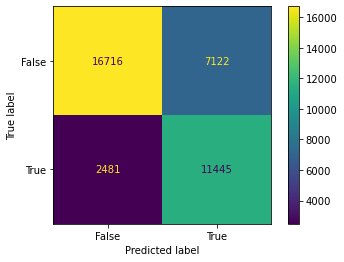

In [77]:
#plot confusion matrix

from sklearn.metrics import plot_confusion_matrix

plot_confusion_matrix(clf, X_test, y_test)
print("The accuracy of your model is: %4.2f ", accuracy_score(y_test, predictions))

#### Logistics Regression (SMOTE)

In [79]:
#SMOTE

from imblearn.over_sampling import SMOTE
smote = SMOTE()

X_sm, y_sm = smote.fit_resample(X, y)
y_sm = y_sm.to_numpy()
y_sm = pd.Series(data=y_sm.flatten())
y_sm.value_counts()

C:\Users\parag\anaconda3\lib\site-packages\sklearn\utils\validation.py:1858: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  warnings.warn(


False    119458
True     119458
dtype: int64

In [80]:
X_train, X_test, y_train, y_test = train_test_split(X_sm, y_sm, test_size=0.2, random_state=100)

In [81]:
classification = LogisticRegression(random_state=0, multi_class='ovr', max_iter=10000).fit(X_sm, y_sm.values.ravel())
y_pred = classification.predict(X_test)
print("The accuracy of the logistic_regression model is: %4.2f "% (classification.score(X_test, y_test)))

from sklearn.metrics import cohen_kappa_score
print("The kappa of the logistic regression model is: %4.2f " %(cohen_kappa_score(y_pred,y_test)) )

C:\Users\parag\anaconda3\lib\site-packages\sklearn\utils\validation.py:1858: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  warnings.warn(


The accuracy of the logistic_regression model is: 0.76 
The kappa of the logistic regression model is: 0.53 


C:\Users\parag\anaconda3\lib\site-packages\sklearn\utils\validation.py:1858: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  warnings.warn(
C:\Users\parag\anaconda3\lib\site-packages\sklearn\utils\validation.py:1858: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  warnings.warn(


#### Decision Tree Classifier

In [82]:
# Using Decision Tree Classifier to improve the accuracy of the model

from sklearn.tree import DecisionTreeClassifier

model = DecisionTreeClassifier()
model_dt= model.fit(X_train, y_train)
print("The accuracy of the model is: {:4.2f}".format(model.score(X_test, y_test)))
print("The kappa of the logistic regression model is: %4.2f " %(cohen_kappa_score(y_pred,y_test)) )

C:\Users\parag\anaconda3\lib\site-packages\sklearn\utils\validation.py:1858: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  warnings.warn(


The accuracy of the model is: 0.87
The kappa of the logistic regression model is: 0.53 


C:\Users\parag\anaconda3\lib\site-packages\sklearn\utils\validation.py:1858: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  warnings.warn(


In [83]:
with open('model_dt.pkl', 'wb') as file:
    pickle.dump(model_dt, file)

#### Ada Boost Classifier

In [84]:
# Load libraries
from sklearn.ensemble import AdaBoostClassifier
from sklearn import datasets
# Import train_test_split function
from sklearn.model_selection import train_test_split
#Import scikit-learn metrics module for accuracy calculation
from sklearn import metrics

In [85]:
# Split dataset into training set and test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3,random_state=100) # 70% training and 30% test

In [86]:
# Create adaboost classifer object
abc = AdaBoostClassifier(n_estimators=1000,learning_rate=1,random_state=100)
# Train Adaboost Classifer
model = abc.fit(X_train, y_train)

#Predict the response for test dataset
y_pred = model.predict(X_test)

C:\Users\parag\anaconda3\lib\site-packages\sklearn\utils\validation.py:1858: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  warnings.warn(
C:\Users\parag\anaconda3\lib\site-packages\sklearn\utils\validation.py:1858: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  warnings.warn(


In [87]:
print("Accuracy: %4.2f " %(metrics.accuracy_score(y_test, y_pred)) )
print("The kappa of the logistic regression model is: %4.2f " %(cohen_kappa_score(y_pred,y_test)) )

Accuracy: 0.80 
The kappa of the logistic regression model is: 0.58 


#### Random Forest

In [88]:
## importing Library
from sklearn.ensemble import RandomForestClassifier
from sklearn.datasets import make_classification

In [89]:
## Taking the X,Y values from smote
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=56)

clf = RandomForestClassifier(n_estimators=500, random_state=100).fit(X_train, y_train.values.ravel())

C:\Users\parag\anaconda3\lib\site-packages\sklearn\utils\validation.py:1858: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  warnings.warn(


In [92]:
predictions = clf.predict(X_test)
predictions

C:\Users\parag\anaconda3\lib\site-packages\sklearn\utils\validation.py:1858: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  warnings.warn(


array([ True,  True,  True, ..., False, False,  True])

In [93]:
y_pred = clf.predict(X_test)
print("The accuracy of the logistic_regression model is: %4.2f "% (clf.score(X_test, y_test)))

from sklearn.metrics import cohen_kappa_score
print("The kappa of the logistic regression model is: %4.2f " %(cohen_kappa_score(y_pred,y_test)) )

C:\Users\parag\anaconda3\lib\site-packages\sklearn\utils\validation.py:1858: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  warnings.warn(
C:\Users\parag\anaconda3\lib\site-packages\sklearn\utils\validation.py:1858: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  warnings.warn(


The accuracy of the logistic_regression model is: 0.88 
The kappa of the logistic regression model is: 0.74 


#### Feature importance

              precision    recall  f1-score   support

       False       0.91      0.89      0.90     23789
        True       0.82      0.86      0.84     13975

    accuracy                           0.88     37764
   macro avg       0.87      0.87      0.87     37764
weighted avg       0.88      0.88      0.88     37764



C:\Users\parag\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)
C:\Users\parag\anaconda3\lib\site-packages\sklearn\utils\validation.py:1858: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  warnings.warn(


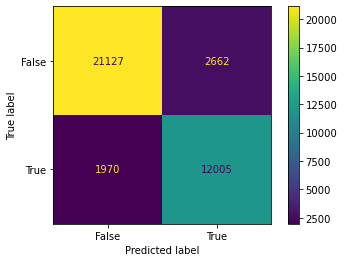

Feature: 0, Score: 0.19933
Feature: 1, Score: 0.07712
Feature: 2, Score: 0.21135
Feature: 3, Score: 0.19394
Feature: 4, Score: 0.07959
Feature: 5, Score: 0.04701
Feature: 6, Score: 0.00505
Feature: 7, Score: 0.00489
Feature: 8, Score: 0.00088
Feature: 9, Score: 0.07610
Feature: 10, Score: 0.09388
Feature: 11, Score: 0.00161
Feature: 12, Score: 0.00839
Feature: 13, Score: 0.00086


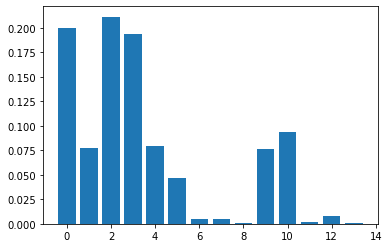

In [94]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred, labels=[False,True]))

plot_confusion_matrix(clf, X_test, y_test)  # doctest: +SKIP
plt.show()

# get importance

importance = clf.feature_importances_

# summarize feature importance

for i,v in enumerate(importance):
    print('Feature: %0d, Score: %.5f' % (i,v))
    
# plot feature importance

from matplotlib import pyplot

pyplot.bar([x for x in range(len(importance))], importance)
pyplot.show()

## Building a function for the model

In [95]:
model_dt.predict([[0,1,2,3,4,5,0,1,1,0,0,0,0,0]])

array([False])

In [96]:
X_test.iloc[0]

0                                        -0.208558
1                                         0.574021
2                                        -0.485698
3                                         1.037902
4                                        -0.053451
5                                         0.099993
gender_unisex                             0.000000
gender_women                              1.000000
merchandise_label_Exclusive               0.000000
merchandise_label_New Season              0.000000
merchandise_label_NoTag                   1.000000
merchandise_label_Permanent Collection    0.000000
merchandise_label_Positively Conscious    0.000000
merchandise_label_Seasonal Pick           0.000000
Name: 47395, dtype: float64

In [97]:
def input_farfetch():
    dct = {'female': [0,1], 'unissex': [1,0], 'exclusive': [1,0,0,0,0,0], 'new season': [0,1,0,0,0,0], 'notag': [0,0,1,0,0,0], 'permanent collection': [0,0,0,1,0,0], 'positively conscious': [0,0,0,0,1,0], 'seasonal pick': [0,0,0,0,0,1]}
    with open('model_dt.pkl', 'rb') as file:
        model_dt = pickle.load(file)
    with open('scaler.pkl', 'rb') as file:
        scaler = pickle.load(file) 
    input_1 = input('brand id: ')
    input_2 = input('similar products: ')
    input_3 = input('merchant id: ')
    input_4 = input('initial price: ')
    input_5 = input('stock total: ')
    input_6 = input('sizes: ')
    input_7 = input('sex: ')
    input_8 = input('label: ')
    numericals = scaler.transform([[input_1,input_2,input_3,input_4,input_5,input_6]])[0]
    new_data = [list(numericals) +dct[input_7] + dct[input_8]]
    prediction = model.predict(new_data)[0]
    if prediction == True:
        print()
        print()
        
        print("The item is going to be on sale soon!")
    else: 
        print()
        print()
        
        print("The item is not going to be on sale soon!")
    

In [ ]:
input_farfetch()

In [ ]:
input_farfetch()

In [ ]:
# Saving function in the function.py (the last one, and then use the bellow code to use in a new notebook)
# do an example in new notebook with the code bellow

from function import input_farfetch #(the function is saved on the function.py)